<a href="https://colab.research.google.com/github/kiradawa/Quality-of-life-index/blob/main/Quality_of_life_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mahmood Yaghi (202011134)
#Mohammad Zaiter (202011465)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cities_pollution.csv to cities_pollution.csv
Saving countries_index.csv to countries_index.csv


In [ ]:
#importing needed libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#loading

In [ ]:
# loading the datasets
data1 = pd.read_csv ('/content/countries_index.csv')
data2 = pd.read_csv ('/content/cities_pollution.csv')
data1

,Name,"""NativeName""","""QualityOfLifeIndex"""
0,Canada,"""Canada""",159.511902
1,Japan,"""日本""",165.326905
2,Norway,"""Kongeriket Norge""",173.158166
3,Ireland,"""Eire""",153.182191
4,Hungary,"""Magyarorszag""",135.343937
...,...,...,...
110,Cote d'Ivoire,"""Republique de Cote d'Ivoire""",24.341801
111,Morocco,"""المغرب""",106.065829
112,Nigeria,"""Nijeriya""",53.089911
113,Kingdom of the Netherlands,"""Koninkrijk der Nederlanden""",182.535902


In [ ]:
data2

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,"""Medina Province""","""Saudi Arabia""",0.000000,50.000000
3959,Cordoba,"""Andalusia""","""Spain""",85.714286,8.333333
3960,Vic,"""Catalonia""","""Spain""",100.000000,0.000000
3961,Segovia,"""Castile and Leon""","""Spain""",100.000000,0.000000


#cleaning data 2

In [ ]:
tbl_countries_stage2 = data2
tbl_countries_stage2.columns = ['City', 'Region','Country','AirQuality','WaterPollution']
tbl_countries_stage2=tbl_countries_stage2.drop(columns = ['Region'])
tbl_countries_stage2

,City,Country,AirQuality,WaterPollution
0,New York City,"""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""United States of America""",66.129032,49.107143
2,San Francisco,"""United States of America""",60.514019,43.000000
3,Berlin,"""Germany""",62.364130,28.612717
4,Los Angeles,"""United States of America""",36.621622,61.299435
...,...,...,...,...
3958,Yanbu,"""Saudi Arabia""",0.000000,50.000000
3959,Cordoba,"""Spain""",85.714286,8.333333
3960,Vic,"""Spain""",100.000000,0.000000
3961,Segovia,"""Spain""",100.000000,0.000000


In [ ]:
tbl_countries_stage2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   object 
 1   Country         3963 non-null   object 
 2   AirQuality      3963 non-null   float64
 3   WaterPollution  3963 non-null   float64
dtypes: float64(2), object(2)
memory usage: 124.0+ KB


In [ ]:
# missing values:
print(tbl_countries_stage2.isna().sum())
#duplicated values:
print("Duplicated",tbl_countries_stage2.duplicated().sum())

City              0
Country           0
AirQuality        0
WaterPollution    0
dtype: int64
Duplicated 5


In [ ]:
average_AirQuality = tbl_countries_stage2.groupby('Country', as_index=False).agg({'AirQuality':'mean'})
average_AirQuality

,Country,AirQuality
0,"""Afghanistan""",37.213694
1,"""Albania""",51.873625
2,"""Algeria""",57.607466
3,"""Andorra""",43.750000
4,"""Angola""",15.000000
...,...,...
172,"""Venezuela""",36.514509
173,"""Vietnam""",44.557443
174,"""Yemen""",39.583333
175,"""Zambia""",45.833333


In [ ]:
average_AirQuality[average_AirQuality['Country']==' "Canada"']

,Country,AirQuality
27,"""Canada""",84.293744


In [ ]:
average_WaterPollution = tbl_countries_stage2.groupby('Country', as_index=False).agg({'WaterPollution':'mean'})
average_WaterPollution

,Country,WaterPollution
0,"""Afghanistan""",53.440657
1,"""Albania""",57.834201
2,"""Algeria""",50.623043
3,"""Andorra""",25.000000
4,"""Angola""",81.250000
...,...,...
172,"""Venezuela""",78.549637
173,"""Vietnam""",65.526918
174,"""Yemen""",85.416667
175,"""Zambia""",80.769231


In [ ]:
average_WaterPollution[average_WaterPollution['Country']==' "Canada"']


,Country,WaterPollution
27,"""Canada""",32.551674


#Merging

In [ ]:
tbl_countries_stage2_1 = pd.merge(average_AirQuality, average_WaterPollution, how='outer')
tbl_countries_stage2_1

,Country,AirQuality,WaterPollution
0,"""Afghanistan""",37.213694,53.440657
1,"""Albania""",51.873625,57.834201
2,"""Algeria""",57.607466,50.623043
3,"""Andorra""",43.750000,25.000000
4,"""Angola""",15.000000,81.250000
...,...,...,...
172,"""Venezuela""",36.514509,78.549637
173,"""Vietnam""",44.557443,65.526918
174,"""Yemen""",39.583333,85.416667
175,"""Zambia""",45.833333,80.769231


In [ ]:
tbl_countries_stage2_1[tbl_countries_stage2_1['Country']==' "United States of America"']

,Country,AirQuality,WaterPollution
168,"""United States of America""",80.603661,40.052397


In [ ]:
tbl_countries_stage2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         177 non-null    object 
 1   AirQuality      177 non-null    float64
 2   WaterPollution  177 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.5+ KB


In [ ]:
print("Duplicated",tbl_countries_stage2_1.duplicated().sum())

Duplicated 0


#cleaning data1

In [ ]:
tbl_countries_stage1 = data1
tbl_countries_stage1=tbl_countries_stage1.drop(columns = [' "NativeName"'])
tbl_countries_stage1.columns = ['Country','QualityOfLifeIndex']
tbl_countries_stage1

,Country,QualityOfLifeIndex
0,Canada,159.511902
1,Japan,165.326905
2,Norway,173.158166
3,Ireland,153.182191
4,Hungary,135.343937
...,...,...
110,Cote d'Ivoire,24.341801
111,Morocco,106.065829
112,Nigeria,53.089911
113,Kingdom of the Netherlands,182.535902


In [ ]:
tbl_countries_stage1[tbl_countries_stage1['Country']=='Canada']

,Country,QualityOfLifeIndex
0,Canada,159.511902


In [ ]:
tbl_countries_stage1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             115 non-null    object 
 1   QualityOfLifeIndex  115 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [ ]:
# missing values:
print(tbl_countries_stage1.isna().sum())
#duplicated values:
print("duplicated",tbl_countries_stage1.duplicated().sum())

Country               0
QualityOfLifeIndex    0
dtype: int64
duplicated 0


#Merging 2

In [ ]:
tbl_countries_stage2_1['Country'] = tbl_countries_stage2_1['Country'].str.replace('"', '')
tbl_countries_stage2_1['Country'] = tbl_countries_stage2_1['Country'].str.replace(' ', '')
tbl_countries_stage1['Country'] = tbl_countries_stage1['Country'].str.replace(' ', '')
tbl_countries_stage2_1['Country'] = tbl_countries_stage2_1['Country'].str.lower()
tbl_countries_stage1['Country'] = tbl_countries_stage1['Country'].str.lower()

In [ ]:
tbl_countries = pd.merge(tbl_countries_stage1,tbl_countries_stage2_1,how='outer')
tbl_countries

,Country,QualityOfLifeIndex,AirQuality,WaterPollution
0,canada,159.511902,84.293744,32.551674
1,japan,165.326905,76.354796,33.925384
2,norway,173.158166,88.684587,26.712641
3,ireland,153.182191,82.843919,34.479856
4,hungary,135.343937,69.938521,31.924383
...,...,...,...,...
174,turkmenistan,NaN,80.555556,18.055556
175,uganda,NaN,56.333333,53.030303
176,vanuatu,NaN,75.000000,70.000000
177,yemen,NaN,39.583333,85.416667


In [ ]:
tbl_countries = tbl_countries.dropna()
tbl_countries

,Country,QualityOfLifeIndex,AirQuality,WaterPollution
0,canada,159.511902,84.293744,32.551674
1,japan,165.326905,76.354796,33.925384
2,norway,173.158166,88.684587,26.712641
3,ireland,153.182191,82.843919,34.479856
4,hungary,135.343937,69.938521,31.924383
...,...,...,...,...
108,zimbabwe,86.088252,45.329670,74.107143
109,botswana,96.875542,64.802632,56.250000
110,coted'ivoire,24.341801,6.944444,79.411765
111,morocco,106.065829,59.823289,49.273227


We only lost two rows that included QualityOfLifeIndex

In [ ]:
tbl_countries['AirPollution'] = 100-tbl_countries['AirQuality']
tbl_countries['WaterQuality'] = 100-tbl_countries['WaterPollution']
tbl_countries

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,QualityOfLifeIndex,AirQuality,WaterPollution,AirPollution,WaterQuality
0,canada,159.511902,84.293744,32.551674,15.706256,67.448326
1,japan,165.326905,76.354796,33.925384,23.645204,66.074616
2,norway,173.158166,88.684587,26.712641,11.315413,73.287359
3,ireland,153.182191,82.843919,34.479856,17.156081,65.520144
4,hungary,135.343937,69.938521,31.924383,30.061479,68.075617
...,...,...,...,...,...,...
108,zimbabwe,86.088252,45.329670,74.107143,54.670330,25.892857
109,botswana,96.875542,64.802632,56.250000,35.197368,43.750000
110,coted'ivoire,24.341801,6.944444,79.411765,93.055556,20.588235
111,morocco,106.065829,59.823289,49.273227,40.176711,50.726773


#Data visualization

In [ ]:
# Top ten highest Quality of life
TopHigh = tbl_countries.sort_values("QualityOfLifeIndex",ascending=False).head(10)
TopHigh

,Country,QualityOfLifeIndex,AirQuality,WaterPollution,AirPollution,WaterQuality
14,switzerland,190.164632,82.955762,22.089957,17.044238,77.910043
9,finland,180.809275,95.771386,19.231145,4.228614,80.768855
62,australia,180.530432,80.598013,31.981841,19.401987,68.018159
32,iceland,179.500319,78.798309,35.290404,21.201691,64.709596
30,germany,177.567556,83.768502,33.495474,16.231498,66.504526
15,austria,177.068074,83.490955,37.733801,16.509045,62.266199
66,newzealand,175.213335,83.787405,39.909186,16.212595,60.090814
2,norway,173.158166,88.684587,26.712641,11.315413,73.287359
33,estonia,172.307724,94.190796,28.313349,5.809204,71.686651
8,luxembourg,172.152982,71.818694,45.738636,28.181306,54.261364


In [ ]:
# Top ten Lowest Quality of life
TopLow = tbl_countries.sort_values("QualityOfLifeIndex").head(10)
TopLow

,Country,QualityOfLifeIndex,AirQuality,WaterPollution,AirPollution,WaterQuality
24,ghana,14.668200,50.185185,69.152047,49.814815,30.847953
110,coted'ivoire,24.341801,6.944444,79.411765,93.055556,20.588235
98,syria,26.100356,31.547619,65.595238,68.452381,34.404762
112,nigeria,53.089911,17.162162,71.303329,82.837838,28.696671
65,cambodia,57.877183,56.705083,67.032828,43.294917,32.967172
68,mongolia,58.626884,23.590686,55.434783,76.409314,44.565217
77,jamaica,62.573096,66.155303,53.044569,33.844697,46.955431
82,iran,64.666263,30.255147,47.777382,69.744853,52.222618
104,bangladesh,65.607267,37.141523,59.124719,62.858477,40.875281
23,ethiopia,69.074769,52.424242,64.848485,47.575758,35.151515


In [ ]:
tbl_countries.describe()

,QualityOfLifeIndex,AirQuality,WaterPollution,AirPollution,WaterQuality
count,113.000000,113.000000,113.000000,113.000000,113.000000
mean,118.016761,54.184226,50.631967,45.815774,49.368033
std,36.856161,20.677446,15.899093,20.677446,15.899093
min,14.668200,6.944444,18.842412,4.228614,6.250000
25%,94.884972,41.160714,37.733801,30.061479,38.645833
50%,114.876384,52.794521,50.376855,47.205479,49.623145
75%,148.899334,69.938521,61.354167,58.839286,62.266199
max,190.164632,95.771386,93.750000,93.055556,81.157588


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


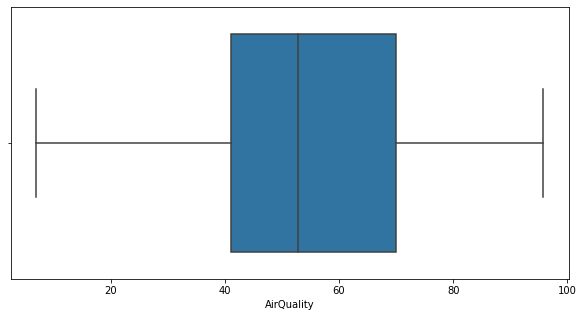

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


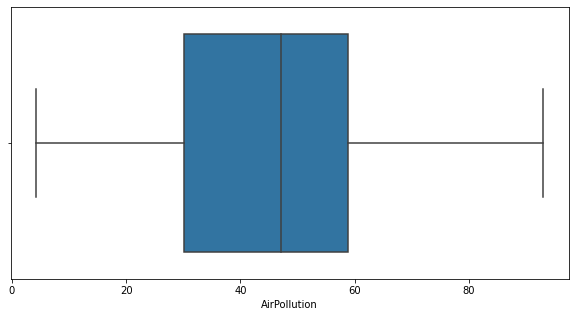

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


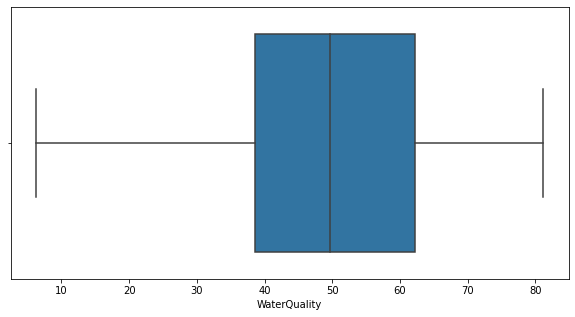

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


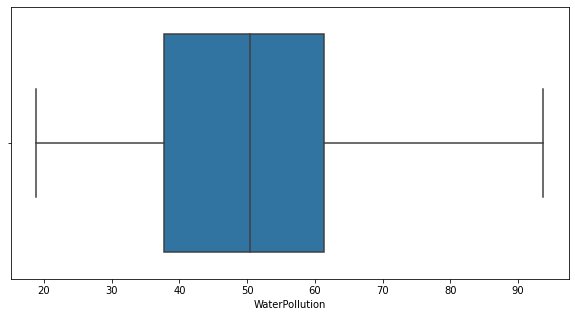

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


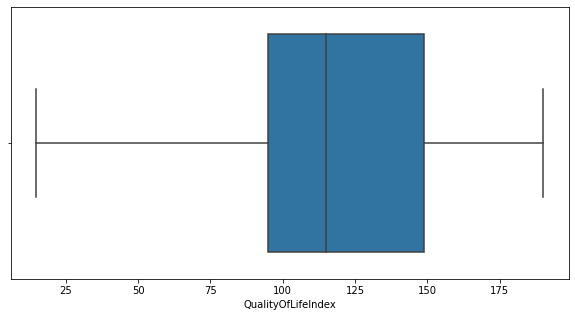

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(tbl_countries['AirQuality'])
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(tbl_countries['AirPollution'])
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(tbl_countries['WaterQuality'])
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(tbl_countries['WaterPollution'])
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(tbl_countries['QualityOfLifeIndex'])
plt.show()

There were no outliars detected

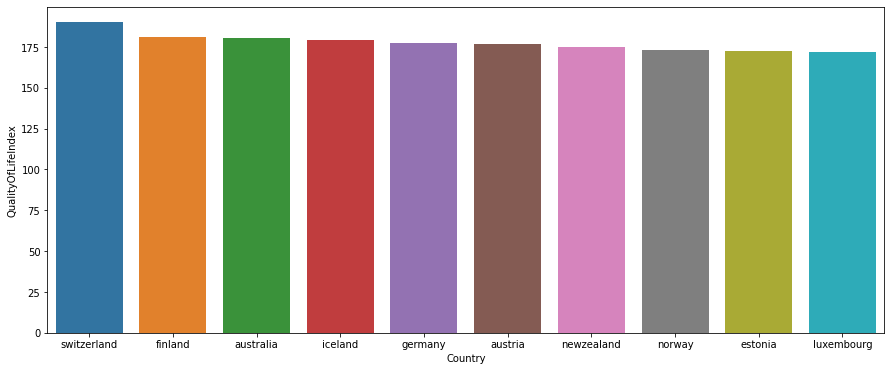

In [ ]:
#Top 10 Highest Quality of life
plt.figure(figsize=(15,6))
sns.barplot(data=TopHigh,x='Country',y='QualityOfLifeIndex')
plt.show()

The highest are all above 170 in the index

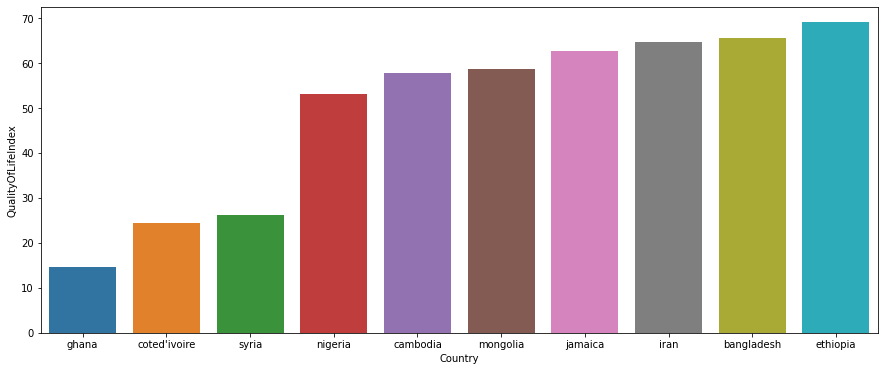

In [ ]:
#Top 10 Lowest Quality of life
plt.figure(figsize=(15,6))
sns.barplot(data=TopLow,x='Country',y='QualityOfLifeIndex')
plt.show()

The lowest ten range from about 15 to almost 70 in the index

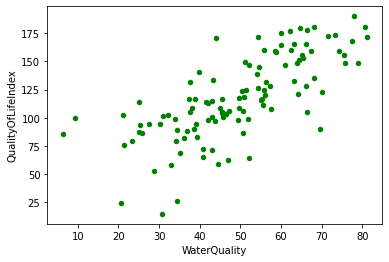

In [ ]:
scatterPlot = tbl_countries.plot.scatter(x='WaterQuality', y='QualityOfLifeIndex', c='green')

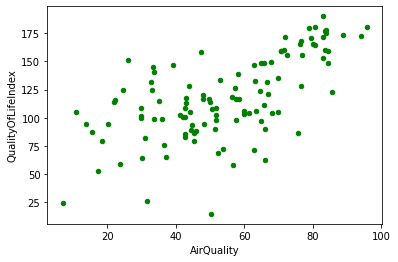

In [ ]:
scatterPlot = tbl_countries.plot.scatter(x='AirQuality', y='QualityOfLifeIndex', c='green')

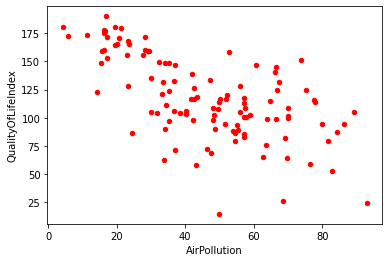

In [ ]:
scatterPlot = tbl_countries.plot.scatter(x='AirPollution', y='QualityOfLifeIndex', c='red')

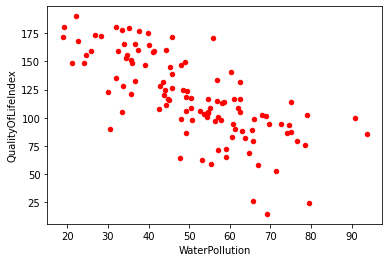

In [ ]:
scatterPlot = tbl_countries.plot.scatter(x='WaterPollution', y='QualityOfLifeIndex', c='red')

There seems to be a common trend where the Higher the Quality of life the higher the water and air Quality, And the lower the pollution 

#Train and Test machine learning model: 
#linear Regression

In [ ]:
# calculating the average Water/Air Quality
tbl_countries['AverageAirWaterQ'] = (tbl_countries['AirQuality'] + tbl_countries['WaterQuality']) / 2
tbl_countries

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,QualityOfLifeIndex,AirQuality,WaterPollution,AirPollution,WaterQuality,AverageAirWaterQ
0,canada,159.511902,84.293744,32.551674,15.706256,67.448326,75.871035
1,japan,165.326905,76.354796,33.925384,23.645204,66.074616,71.214706
2,norway,173.158166,88.684587,26.712641,11.315413,73.287359,80.985973
3,ireland,153.182191,82.843919,34.479856,17.156081,65.520144,74.182031
4,hungary,135.343937,69.938521,31.924383,30.061479,68.075617,69.007069
...,...,...,...,...,...,...,...
108,zimbabwe,86.088252,45.329670,74.107143,54.670330,25.892857,35.611264
109,botswana,96.875542,64.802632,56.250000,35.197368,43.750000,54.276316
110,coted'ivoire,24.341801,6.944444,79.411765,93.055556,20.588235,13.766340
111,morocco,106.065829,59.823289,49.273227,40.176711,50.726773,55.275031


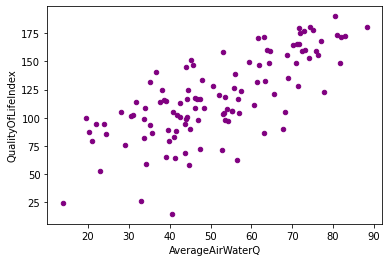

In [ ]:
scatterPlot = tbl_countries.plot.scatter(x='AverageAirWaterQ', y='QualityOfLifeIndex', c='purple')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
x = tbl_countries.iloc[:,6:7]
print("input: \n", x)
y = tbl_countries.iloc[:,1:2]
print("output: \n", y)

input: 
      AverageAirWaterQ
0           75.871035
1           71.214706
2           80.985973
3           74.182031
4           69.007069
..                ...
108         35.611264
109         54.276316
110         13.766340
111         55.275031
112         22.929417

[113 rows x 1 columns]
output: 
      QualityOfLifeIndex
0            159.511902
1            165.326905
2            173.158166
3            153.182191
4            135.343937
..                  ...
108           86.088252
109           96.875542
110           24.341801
111          106.065829
112           53.089911

[113 rows x 1 columns]


In [ ]:
#spliting the data into test and train
#train takes 80% and test takes 20%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=4)

#displaying the shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 1)
(23, 1)
(90, 1)
(23, 1)


In [ ]:
#fitting the model
LRegressor = LinearRegression()
LRegressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
#the slope and intercept values
print("The intercept value: ",LRegressor.intercept_)
print("The slope value: ",LRegressor.coef_)

The intercept value:  [35.73025656]
The slope value:  [[1.62509368]]


In [ ]:
Ypre = LRegressor.predict(x_test)

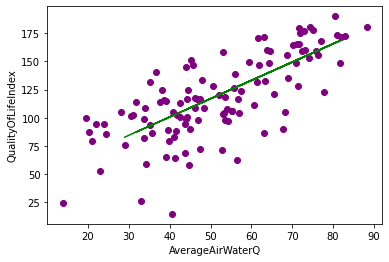

In [ ]:
tbl_countries.plot.scatter(x='AverageAirWaterQ',y='QualityOfLifeIndex')
plt.scatter(x, y, color = "purple")
plt.plot(x_test,Ypre,color='green')
plt.show()

Predecting the Accuracy

In [ ]:
#using Root Mean Squared Error, Mean Absolute Error, Mean Squared Error we can Evaluate it
print('Mean Absolute Error: \n', mean_absolute_error(Ypre,y_test))
print('Mean Squared Error: \n', mean_squared_error(Ypre,y_test))
print('Root Mean Squared Error: \n',np.sqrt(mean_squared_error(Ypre,y_test)))

Mean Absolute Error: 
 20.60015008508658
Mean Squared Error: 
 798.6756667201734
Root Mean Squared Error: 
 28.26085042457451
